# Data Analysis: A Bayesian Tutorial $\rightarrow$ Chapter 3 Walkthrough: Parameter Estimation II

#### notebook setup

In [1]:
import itertools as it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.misc
import scipy.optimize as op
import random
from IPython.display import display, Math, Latex
from mpl_toolkits.mplot3d import Axes3D
import os

# plotting options
%matplotlib inline
np.set_printoptions(precision=4, linewidth=120)
plt.rc('font'  , size=18)
plt.rc('figure', figsize=(10, 8))
plt.rc('axes'  , labelsize=22)
plt.rc('legend', fontsize=16)

np.set_printoptions(precision=4)
plt.rc('figure', figsize=(10, 8))

In [2]:
os.chdir('%s/examples/data_analysis_a_bayesian_tutorial' % os.getenv('DST'))
print(os.getcwd())

/Users/rwk7t/Development/dst/examples/data_analysis_a_bayesian_tutorial


#### tex setup
$ \newcommand{\prob}{\mathbb{P}} $
$ \newcommand{\Nk}{N_k} $
$ \newcommand{\Nks}{\{N_k\}} $
$ \newcommand{\data}{\{\text{data}\}} $
$ \newcommand{\xo}{x_O} $
$ \newcommand{\Xo}{X_O} $
$ \newcommand{\Yo}{Y_O} $
$ \newcommand{\Xj}{X_j} $
$ \newcommand{\Xjs}{\{X_j\}} $
$ \newcommand{\w}{\omega} $
$ \newcommand{\xt}{x(t)} $
$ \newcommand{\xbt}{\overline{x}(t)} $
$ \newcommand{\Xw}{X(\w)} $
$ \newcommand{\Xbw}{\overline{X}(\w)} $
$ \newcommand{\fs}{f_s} $
$ \newcommand{\ws}{\w_s} $
$ \newcommand{\deltaT}{\delta_T} $
$ \newcommand{\sinc}{\operatorname{sinc}} $
$ \newcommand{\rect}{\operatorname{rect}} $
$ \newcommand{\jwt}{j \omega t} $
$ \newcommand{\jwot}{j \omega_0 t} $
$ \newcommand{\epjwt}{e^{+\jwt}} $
$ \newcommand{\emjwt}{e^{-\jwt}} $
$ \newcommand{\epjwot}{e^{+\jwot}} $
$ \newcommand{\emjwot}{e^{-\jwot}} $
$ \newcommand{\intinf}{\int_{-\infty}^{+\infty}} $
$ \newcommand{\half}{\frac{1}{2}} $
$ \newcommand{\twopi}{2 \pi} $
$ \newcommand{\ootwopi}{\frac{1}{\twopi}} $

\begin{array}{lcl}
\text{\prob    } & \rightarrow & \prob    \\
\text{\Nk      } & \rightarrow & \Nk      \\
\text{\Nks     } & \rightarrow & \Nks     \\
\text{\data    } & \rightarrow & \data    \\
\text{\xo      } & \rightarrow & \xo      \\
\text{\Xo      } & \rightarrow & \Xo      \\
\text{\Yo      } & \rightarrow & \Yo      \\
\text{\Xj      } & \rightarrow & \Xj      \\
\text{\Xjs     } & \rightarrow & \Xjs     \\
\text{\w       } & \rightarrow & \w       \\
\text{\xt      } & \rightarrow & \xt      \\
\text{\xbt     } & \rightarrow & \xbt     \\
\text{\Xw      } & \rightarrow & \Xw      \\
\text{\Xbw     } & \rightarrow & \Xbw     \\
\text{\fs      } & \rightarrow & \fs      \\
\text{\ws      } & \rightarrow & \ws      \\
\text{\deltaT  } & \rightarrow & \deltaT  \\
\text{\sinc    } & \rightarrow & \sinc    \\
\text{\rect    } & \rightarrow & \rect    \\
\text{\jwt     } & \rightarrow & \jwt     \\
\text{\jwot    } & \rightarrow & \jwot    \\
\text{\epjwt   } & \rightarrow & \epjwt   \\
\text{\emjwt   } & \rightarrow & \emjwt   \\
\text{\epjwot  } & \rightarrow & \epjwot  \\
\text{\emjwot  } & \rightarrow & \emjwot  \\
\text{\intinf  } & \rightarrow & \intinf  \\
\text{\half    } & \rightarrow & \half    \\
\text{\twopi   } & \rightarrow & \twopi   \\
\text{\ootwopi } & \rightarrow & \ootwopi \\
\end{array}

## Introduction

In the previous chapter, we were concerned with the most elementary type of data analysis problem: parameter estimation involving just one unknown variable. Now let us progress to the more common case in which there are several parameters; some of these will be of interest to us, but others merely a nuisance. As well as being a more challenging optimization problem, we will be led to generalize the idea of error-bars to include correlations and to the use of marginalization to deal with the unwanted variables. We will also see how certain approximations naturally give rise to some of the most frequently used analysis procedures, and discuss the so-called propagation of errors.

## 3.1:  Example 4 - amplitude of a signal in the presence of background

In many branches of science, we are often faced with the task of having to estimate the amplitude of a signal in the presence of a background. For example, an X-ray diffraction pattern from a crystalline sample will contain both the distinctive Bragg peaks of interest and a general contribution from diffuse scattering processes; in an astronomical setting, the emission spectrum of a galaxy may be contaminated by stray light from the night sky. An idealized one-dimensional situation is illustrated below in Fig 3.1, where the horizontal x-axis represents the measurement variable (such as the scattering angle, wavelength, or whatever). 

<img src="fig3p1.png" width=900/>

In the simplest case, the background can be taken as being flat, and of unknown magnitude B, and the signal of interest assumed to be the amplitude A of a peak of known shape and position. The data for these problems are frequently integer-valued, and correspond to things like the number of photons detected from a quasar at a certain wavelength or the number of neutrons scattered by a sample in a given direction. Given such a set of counts $\{N_k\}$, measured at experimental settings $\{x_k\}$, what is our best estimate of the amplitude of the signal peak and the background?

Let us begin by thinking about the nature of the data a little more carefully. It seems reasonable that we should expect the number of counts in the kth data-channel to be proportional to the sum of the signal and the background at $x_k$ ; taking the peak to be Gaussian in shape, for the sake of argument, with a width of $w$ and centred at $x_O$ , the ideal datum $D_k$ ought to be given by:

$$
D_k = n_0 \left[ A e^{-(x_k - x_O)^2/2w^2} + B \right] \,,
$$

where no is a constant related to the amount of time for which the measurements were made. Unlike the number of counts $N_k$ , however, the $D_k$ given above will not generally be a whole number. Therefore, the actual datum will be an integer $(\geq 0)$ in the vicinity of this expected value. A pdf which incorporates this property, and is usually invoked in such counting experiments, is a Poisson distribution:

$$
\mathbb{P}( N | D)  = \frac{D^N e^{-D} }{N!}
$$

and is illustrated in Fig 3.2.  

<img src="fig3p2.png" width=900/>

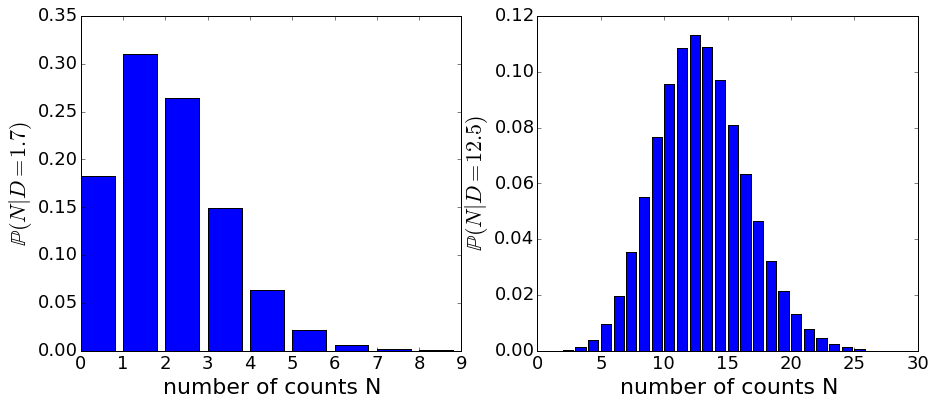

In [3]:
fig, (ax0, ax1) = plt.subplots(1,2)
fig.set_size_inches(15,6)

D = 1.7
N = np.arange(9)
ax0.bar(N, st.poisson.pmf(N, mu=D))
ax0.set_xlabel("number of counts N")
ax0.set_ylabel(r"$\mathbb{P}(N|D=%1.1f)$"%D)

D = 12.5
N = np.arange(26)
ax1.bar(N, st.poisson.pmf(N, mu=D))
ax1.set_xlabel("number of counts N")
ax1.set_ylabel(r"$\mathbb{P}(N|D=%1.1f)$"%D)

We leave the derivation of this strange-looking formula to Chapter 5 but note the result that its formal expectation value is indeed equal to D:

$$
\langle N \rangle = \sum_{N = 0}^{\infty} N \times \mathbb{P}(N|D) = D
$$

**Proof:**

\begin{align}
\langle N \rangle 
&= \sum_{N = 0}^{\infty} N \times \mathbb{P}(N|D) \\
&= \sum_{N = 1}^{\infty} N \frac{D^N e^{-D} }{N!} \quad \text{N = 0 term is zero} \\
&= D e^{-D} \sum_{N = 1}^{\infty} \frac{D^{N-1}  }{(N-1)!} \quad \text{now shift $N-1 \to N$ in the sum} \\
&= D e^{-D} \sum_{N = 0}^{\infty} \frac{D^{N}  }{N!} \\
&= D e^{-D} e^D \\
&= D \\
\end{align}

Recall that what is actually observed is the count for each "bin".  We use the poisson probablity to assign the likelihood of the datum $N_k$:

$$
\mathbb{P}(N_k | \ A, B, I) = 
\frac{D_k^{N_k} e^{-D_k} }{ N_k !}
$$

where the background information $I$ includes a knowledge of the relationship between the expected number of counts $D_k$ and the parameters of interest $A$ and $B$; for the case of the Gaussian peak-shape model given above, this means that $x_O$ , $w$ and $n_0$ are taken as given (as well as $x_k$). If the data are <strong>independent</strong>, so that, when given the values of $A$ and $B$, the number of counts observed in one channel does not influence what we would expect to find in another, then the likelihood function is just the product of the probabilities for the individual measurements:

$$
\mathbb{P}(\{N_k\} | \ A, B, I) = \prod_{k = 1}^{M}\mathbb{P}(N_k | \ A, B, I)
$$

where there are M data.

Our inference about the amplitude of the signal and the background is embodied
in the posterior pdf $\mathbb{P}(A,B|\{Nk\},I)$; as usual, we use Bayes’ theorem to help us calculate it:

$$
\mathbb{P}(A,B|\{N_k\},I)
\propto 
\mathbb{P}(\{N_k\} | \ A, B, I) \times
\mathbb{P}(A,B|I)
$$

Having already dealt with the likelihood function above, all that remains is the assignment of the prior pdf. Irrespective of the data, the one thing we do know is that the amplitude of neither the signal nor the background can be negative; the most naïve way of encoding this is through a uniform pdf in the positive quadrant:

$$
\mathbb{P}(A,B|\ I)
 = \left\{ 
 \begin{array}{cc}
 \text{constant} & \text{for $A\geq 0$ and $B \geq 0$,} \\
 0 & \text{otherwise.}
 \end{array}
 \right.
$$

Later, in Chapter 5, we will see that this simple flat pdf is not necessarily the one that represents the most prior ignorance for this problem, but it is quite adequate for our present needs. Although we should formally have upper bounds $A_{\rm max}$ and $B_{\rm max}$, which determine the normalization constant in the prior, we will just assume they are sufficiently large as not to impose a cut-off on the posterior pdf; that is to say, $\prob(\{N_k\} | \ A, B, I)$
will have diminished (gradually) to a negligibly small value before these limits are reached.

#### Data Generation

Generate the data given the A and B.  In general, this is given by the "experiment".

In [4]:
seed=2
np.random.seed(seed)

# gaussian parameters
A_true = 1
B_true = 2

x0    = 0
FWHM  = 5
sigma = FWHM/2.35

# guess and check, so that max D = 100
n0         = 33.5
n_bins     = 15
x_measured = np.linspace(-7.5, 7.5, n_bins)

In [5]:
# measured count D(x) = <N(x)>
def D(x, A, B, n0=n0, x0=x0, sigma=FWHM/2.35):    
    result = n0*(A*np.exp(-(x-x0)**2/(2*sigma**2)) + B)
    return result

In [6]:
np.max(D(x_measured, A_true, B_true))

100.5

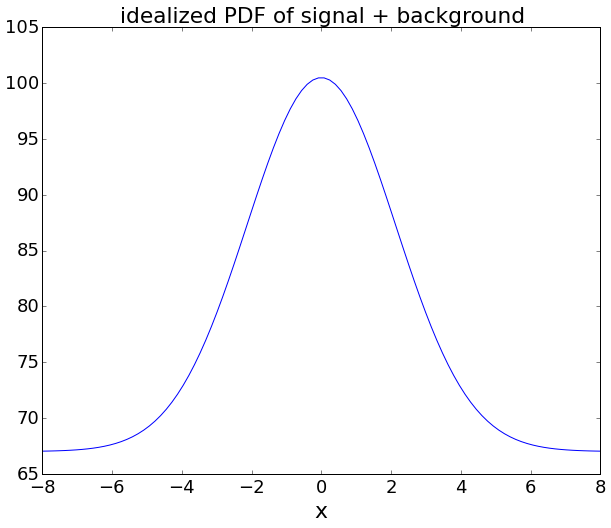

In [7]:
x_plot = np.linspace(-8, 8, 100)
d_plot = D(x_plot, A_true, B_true)
plt.plot(x_plot, d_plot)
plt.xlabel('x')
plt.title('idealized PDF of signal + background')

Now draw a random sample of points from this distribution:

In [8]:
def draw_N(x, n0=n0, x0=x0, FWHM=FWHM):    
    Dk     = D(x, A_true, B_true, n0=n0, x0=x0, sigma=FWHM/2.35)
    result = np.array([np.random.poisson(lam = d, size=1) for d in Dk])
    return result.ravel()

Nk = draw_N(x_measured)

((15,), (15,))

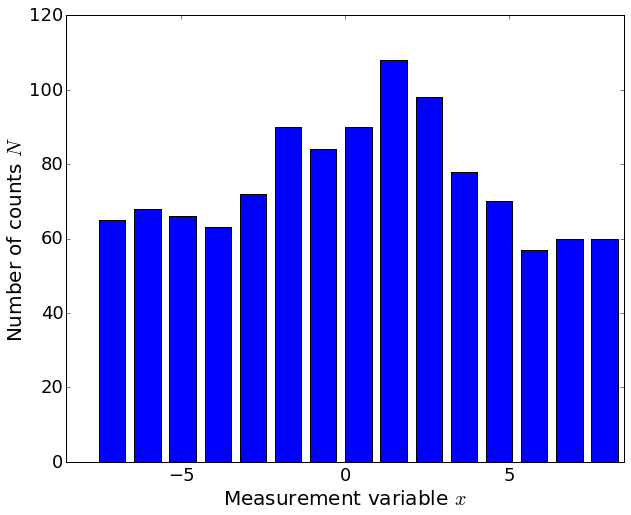

In [9]:
plt.bar(x_measured, Nk)
plt.xlabel('Measurement variable $x$', fontsize = 20)
plt.ylabel('Number of counts $N$'    , fontsize = 20)
plt.xlim([np.min(x_measured)-1, np.max(x_measured)+1])
x_measured.shape, Nk.shape

#### Posterior:

Multiplying the Poisson likelihood resulting from the likelihood by the prior above, according to Bayes’ theorem of eqn, yields the posterior pdf; its logarithm L is given by

\begin{align}
L &= \log_e\left[\prob(A, B |\ \left\{N_k\right\}, I) \right] \\
  &= \text{contant} + \sum_{k=1}^M\left[N_k \log_e(D_k) = D_k\right]
\end{align}

where the constant includes all terms not involving A and B, and the latter are both positive. Our best estimate of the amplitude of the signal and the background is given by the values of A and B which maximize L; its reliability is indicated by the width, or sharpness, of the posterior pdf about this optimal point. Let us illustrate the use of this analysis with some computer examples.

In [10]:
# Randy's version:

def L_inside(x, A, B) :
    Dk = D(x, A, B)
    return np.sum( Nk*np.log(Dk) - Dk)

def L(x, A, B) :

    if len(A) > 0 :
        list_of_tuples = list(zip(A.flatten(), B.flatten()))
        result = np.array([L_inside(x, a,b) for a,b in list_of_tuples])
        result = result.reshape(A.shape)
    else :
        L(x, A, B)
        
    return result    

In [11]:
# Ryan's implementation:

def L(x, A, B, Nk=Nk, n0=n0, x0=x0, FWHM=FWHM):
    
    # validate parameters
    x = np.atleast_1d(x)
    A = np.atleast_1d(A)
    B = np.atleast_1d(B)
    assert(A.shape == B.shape)
    
    # loop over all parameramers and calculcate log posterior
    tuples = list(zip(A.flatten(), B.flatten()))
    result = np.empty(shape=(len(tuples),))
    for idx, (a,b) in enumerate(tuples):
        Dk          = D(x, a, b, n0=n0, x0=x0, sigma=FWHM/2.35)
        result[idx] = np.sum(Nk*np.log(Dk) - Dk)

    # reform to correct shape
    result = result[0] if result.size==1 else result.reshape(A.shape)
    
    return result

In [12]:
a = np.linspace(0.01,3,500)
b = np.linspace(0.01,3,500)
[A,B] = np.meshgrid(a,b)

In [13]:
L_calc = L(x_measured, A, B)
L_calc = L_calc - np.max(L_calc)
L_calc.shape

(500, 500)

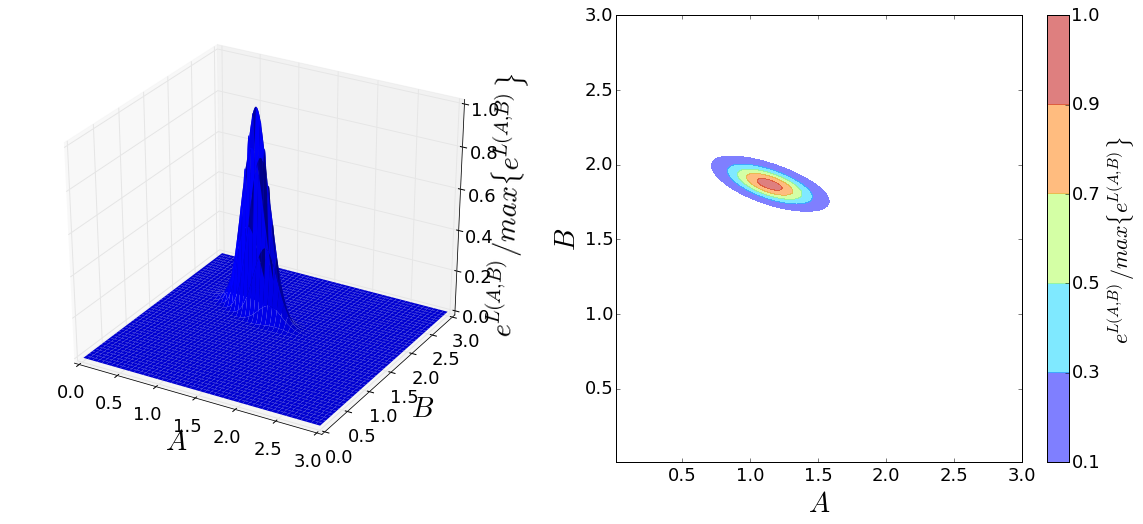

In [14]:
fig = plt.figure(figsize=(20,8))

# normalize to maximum
exp_L = np.exp(L_calc)
exp_L = exp_L/np.max(exp_L)

# 3d plot
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax0.plot_surface(A, B, exp_L, linewidth=0)
ax0.set_xlabel('$A$', fontsize = 28)
ax0.set_ylabel('$B$', fontsize = 28)
ax0.set_zlabel('$e^{L(A,B)}/max\{e^{L(A,B)}\}$', fontsize = 28)

# contour
levels = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
ax1 = fig.add_subplot(1, 2, 2)
cs = ax1.contourf(A, B, exp_L, levels=levels, linewidth=2, alpha=0.5)
ax1.set_xlabel('$A$', fontsize = 28)
ax1.set_ylabel('$B$', fontsize = 28)
fig.colorbar(cs, ax=ax1, label='$e^{L(A,B)}/max\{e^{L(A,B)}\}$')
plt.show()

##### figure 3.3

Four sets of data and the posterior pdfs which result from them are shown in Fig. 3.3 below. The data were generated with a Poisson random number generator from the simple ‘Gaussian peak on flat background model’ model. They are plotted as histograms, as experimental measurements would normally correspond to the number of counts detected in finite-sized channels; for simplicity, we have chosen the bin-width to be unity. In all cases, the underlying signal is centred at the origin, so that $x_O$ = 0, and has a FWHM of 5 units; this is assumed to be known for the analysis. The posterior pdf is now two-dimensional, since it is a function of both A and B. We can display it using contours, which are lines joining points of equal probability density, just like hills and valleys are represented on a topographic map. In Fig. 3.3, the contours correspond to 10%, 30%, 50%, 70% and 90% of the maximum probability.

The first panel shows the number of counts detected in 15 data-bins, where the parameter $n_o$ was chosen to give a maximum expectation of 100 counts; its value is taken as given. The corresponding posterior pdf, resulting from the exponential of the log posterior, is plotted in the second panel on the top; it indicates that our best estimate of the amplitude of the signal is approximately equal to one, and is about half the magnitude of the background. The second panel down shows the data for the same set-up, but where the experiment was conducted for only one-tenth of the time; the number of counts is down by a factor of ten, and the data appear more noisy. The corresponding posterior pdf is about three times as broad as before, in both directions, and is in line with the √10 that we might have guessed, on the basis of our experience from the examples of the previous chapter. The posterior is truncated (or suddenly equal to zero) for negative values of A and reflects the importance of the prior when the data are of poor quality. In the third panel down we return to the original count-rate, but have 31 data spread over twice the measurement range. With the doubling of the number of data, we might expect the reliability with which A and B can be estimated would improve by a factor of √2 ; although a little hard to tell from these diagrams, this only seems to be true for the background. Some further thought reveals this to be reasonable: measurements far away from the origin only tell us about the background, since they contain no information about the signal peak. The last two panels illustrate the case when there are just 7 data spread over half the original range in x; the posterior pdf is noticeably broadened, by more than a simple factor of √2 , and is distinctly skewed. These features are indicative of a strong correlation between our estimates of A and B: as the range of x over which the data are collected is severely restricted, it becomes difficult to tell the signal apart from the background!

In [15]:
def plot_post(\
        ax0,
        ax1,
        nbins=15,
        xlim=[-7.5, 7.5],
        A_true=A_true,
        B_true=B_true,
        n0=n0,
        x0=x0,
        FWHM=FWHM,
        width=0.8,
        seed=seed
    ):
    
    # generate simulated measured data
    np.random.seed(seed)
    x_measured = np.linspace(xlim[0], xlim[1], nbins)
    Nk         = draw_N(x_measured, n0=n0, x0=x0, FWHM=FWHM)
       
    # log posterior scanned over parameter space
    a = np.linspace(0.01,3,500)
    b = np.linspace(0.01,3,500)
    [A,B] = np.meshgrid(a,b)
    
    L_calc = L(x_measured, A, B, Nk=Nk, n0=n0, x0=x0, FWHM=FWHM)
    L_calc = L_calc - np.max(L_calc)
    
    exp_L = np.exp(L_calc)
    exp_L = exp_L/np.max(exp_L)    
    
    # plot the data
    ax0.bar(x_measured, Nk, width=width, alpha=0.5)
    ax0.set_xlabel('Measurement variable $x$', fontsize = 20)
    ax0.set_ylabel('Number of counts $N$'    , fontsize = 20)
    ax0.set_xlim([np.min(x_measured)-1, np.max(x_measured)+1])
    
    levels = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    cs = ax1.contourf(A, B, exp_L, levels=levels, linewidth=2, alpha=0.5)
    ax1.set_xlabel('$A$', fontsize = 28)
    ax1.set_ylabel('$B$', fontsize = 28)
    ax1.figure.colorbar(cs, ax=ax1, label='$e^{L(A,B)}/max\{e^{L(A,B)}\}$')

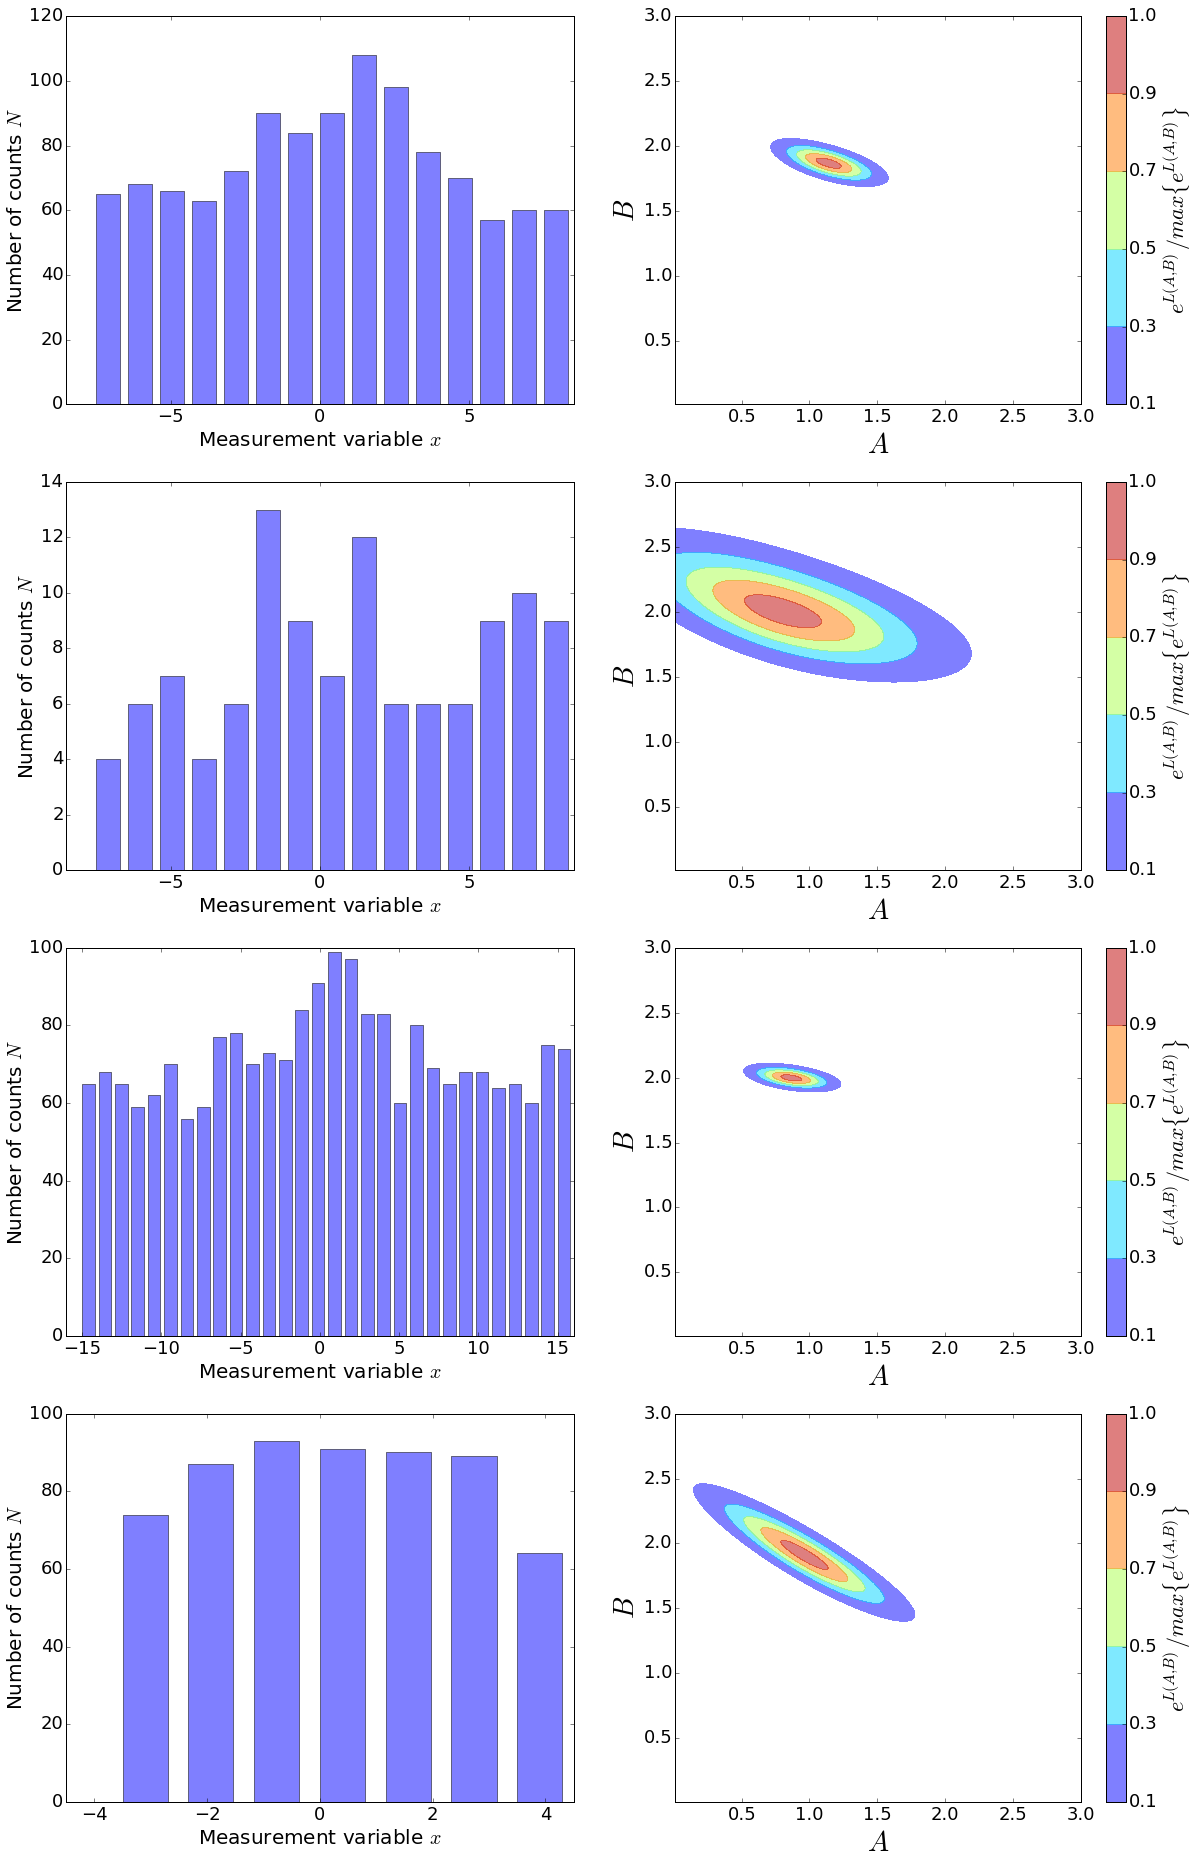

In [16]:
fig, axes = plt.subplots(4,2,figsize=(20,32))

plot_post(axes[0,0], axes[0,1], nbins=15, xlim=[-7.5, 7.5], n0=33.5, seed=seed)
plot_post(axes[1,0], axes[1,1], nbins=15, xlim=[-7.5, 7.5], n0=3.35, seed=seed)
plot_post(axes[2,0], axes[2,1], nbins=30, xlim=[-15 ,  15], n0=33.5, seed=seed)
plot_post(axes[3,0], axes[3,1], nbins=7 , xlim=[-3.5, 3.5], n0=33.5, seed=seed)
plt.show()

### 3.1.1 Marginal Distributions

The two-dimensional posterior pdf above describes completely our joint inference about the values of A and B. Often, however, we are not interested in the background. It has to be included in our calculation, because it is needed for the likelihood function, but we have no intrinsic interest in knowing its value: its presence is merely a nuisance. What we would really like to estimate is just the amplitude of the signal, irrespective of the size of the background; in other words, we require the pdf $\prob(A|\{Nk\},I)$.  According to the marginalization rule from chapter 1, this can be obtained simply by integrating the joint posterior pdf with respect to B:

$$\prob(A|\{N_k\}, I) = \int_0^\infty \prob(A, B |\{N_k\}, I)\ dB$$

There may, of course, be situations where the background is of primary interest and the presence of a peak is a nuisance. This seemingly perverse case does sometimes occur, because the phenomena that give rise to broad features in the data may be of as much scientific importance as the ones resulting in a sharp signal. All we need to do then, to obtain the pdf $\prob(B|\{Nk\},I)$, is integrate the joint posterior pdf with respect to A:

$$\prob(B|\{N_k\}, I) = \int_0^\infty \prob(A, B |\{N_k\}, I)\ dA$$

The four pairs of marginal distributions corresponding to the data-sets, and posterior pdfs, of Fig. 3.3 are plotted in Fig. 3.4; it is now much easier to see the effects of the different experimental set-ups on the reliability of the inferred values A and B, which were mentioned a little earlier.

In [17]:
def get_post_B_known(nbins=15, xlim=[-7.5, 7.5], A_true=A_true, B_true=B_true, n0=n0, x0=x0, FWHM=FWHM, seed=seed):
    
    # generate simulated measured data
    np.random.seed(seed)
    x_measured = np.linspace(xlim[0], xlim[1], nbins)
    Nk         = draw_N(x_measured, n0=n0, x0=x0, FWHM=FWHM)
       
    # log posterior scanned over parameter space
    a = np.linspace(0.01,3,500)
    b = np.ones_like(a)*B_true
    [A,B] = np.meshgrid(a,b)
    
    L_calc = L(x_measured, A, B, Nk=Nk, n0=n0, x0=x0, FWHM=FWHM)
    L_calc = L_calc - np.max(L_calc)
    
    exp_L = np.exp(L_calc)
    exp_L = exp_L/np.max(exp_L)    
    
    return exp_L, A

In [18]:
def get_post(nbins=15, xlim=[-7.5, 7.5], A_true=A_true, B_true=B_true, n0=n0, x0=x0, FWHM=FWHM, seed=seed):
    
    # generate simulated measured data
    np.random.seed(seed)
    x_measured = np.linspace(xlim[0], xlim[1], nbins)
    Nk         = draw_N(x_measured, n0=n0, x0=x0, FWHM=FWHM)
       
    # log posterior scanned over parameter space
    a = np.linspace(0.01,3,500)
    b = np.linspace(0.01,3,500)
    [A,B] = np.meshgrid(a,b)
    
    L_calc = L(x_measured, A, B, Nk=Nk, n0=n0, x0=x0, FWHM=FWHM)
    L_calc = L_calc - np.max(L_calc)
    
    exp_L = np.exp(L_calc)
    exp_L = exp_L/np.max(exp_L)    
    
    return exp_L, A, B

In [19]:
def plot_marginals(ax0, ax1, nbins=15, xlim=[-7.5, 7.5], A_true=A_true, B_true=B_true, n0=n0, x0=x0, FWHM=FWHM, seed=seed):
    
    post, A, B       = get_post        (nbins=nbins, xlim=xlim, A_true=A_true, B_true=B_true, n0=n0, x0=x0, FWHM=FWHM, seed=seed)
    post_b_known, A2 = get_post_B_known(nbins=nbins, xlim=xlim, A_true=A_true, B_true=B_true, n0=n0, x0=x0, FWHM=FWHM, seed=seed)
    a = A[0,:]
    b = B[:,0]
    
    # normalize peak to one
    marge_a         = np.trapz(y=post        , x=a, axis=0)
    marge_a_b_known = np.trapz(y=post_b_known, x=a, axis=0)   
    marge_a         = marge_a/np.max(marge_a)
    marge_a_b_known = marge_a_b_known/np.max(marge_a_b_known)    
    ax0.plot(a, marge_a)
    ax0.plot(a, marge_a_b_known, 'k--')
    ax0.set_xlabel(r'Amplitude $A$')
    ax0.set_ylabel(r'$\mathbb{P}(A | \{N_k\},I)$')
    ax0.legend(['B infered', 'B known'])
    
    marge_b = np.trapz(y=post, x=b, axis=1) 
    marge_b = marge_b/np.max(marge_b)
    ax1.plot(b, marge_b)
    ax1.set_xlabel(r'Background $B$')
    ax1.set_ylabel(r'$\mathbb{P}(B | \{N_k\},I)$')

##### figure 3.4

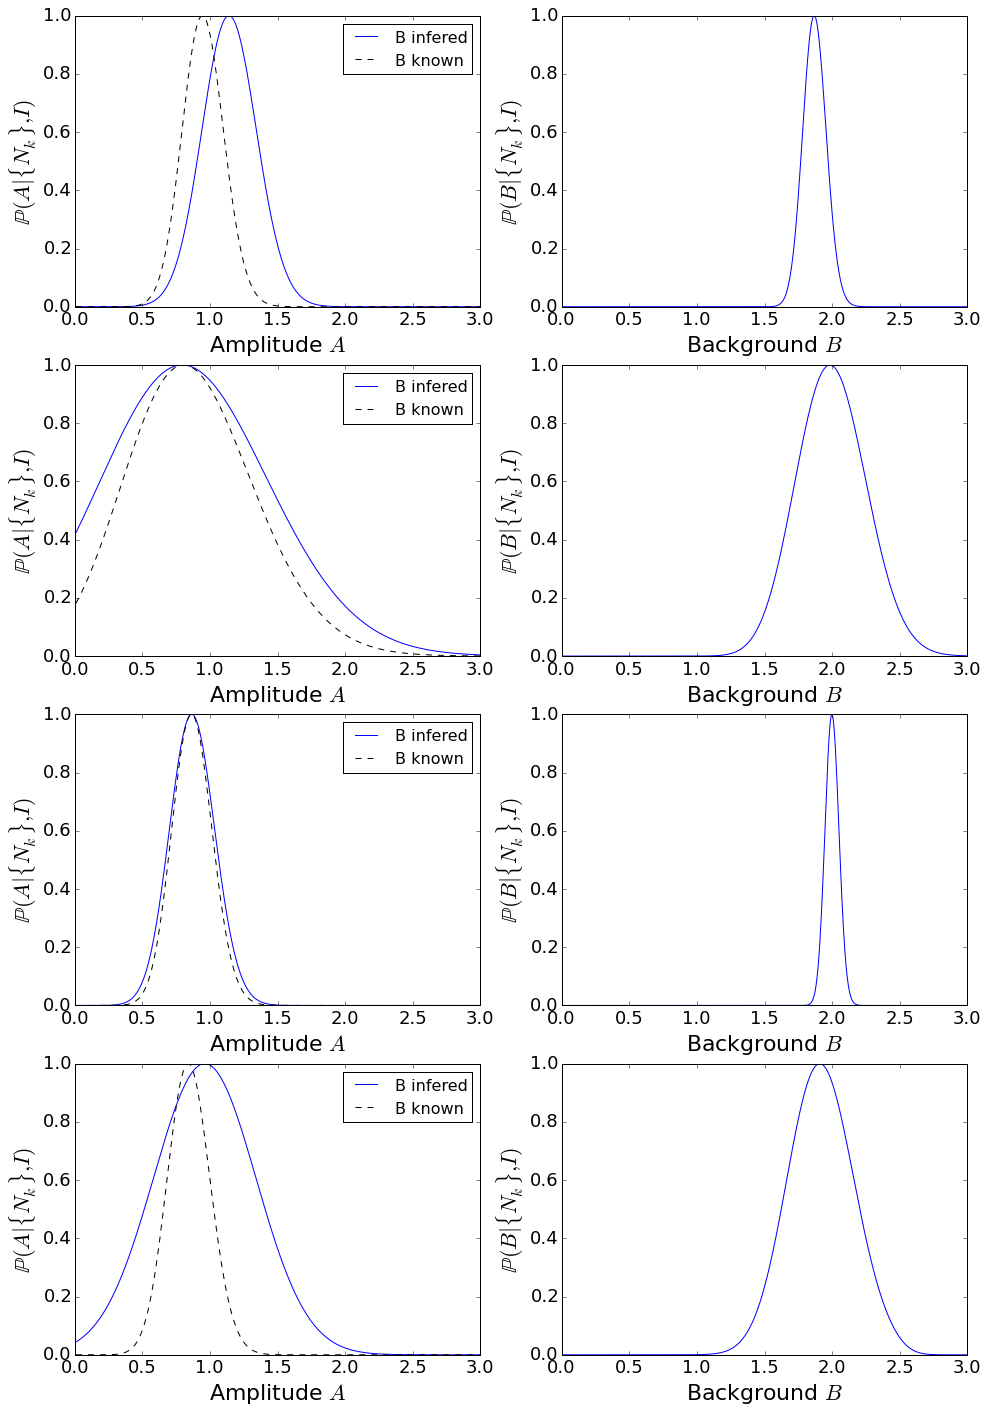

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(16,24))

plot_marginals(axes[0, 0], axes[0, 1], nbins=15, xlim=[-7.5, 7.5], n0=33.5, seed=seed)
plot_marginals(axes[1, 0], axes[1, 1], nbins=15, xlim=[-7.5, 7.5], n0=3.35, seed=seed)
plot_marginals(axes[2, 0], axes[2, 1], nbins=30, xlim=[-15 , 15 ], n0=33.5, seed=seed)
plot_marginals(axes[3, 0], axes[3, 1], nbins=7 , xlim=[-3.5, 3.5], n0=33.5, seed=seed)

plt.show()

To avoid any confusion, we should emphasize that the marginal distribution for A, $\prob(A|\{Nk\},I)$, is not the same as the conditional pdf $\prob(A|\{Nk\},B,I)$; although both describe our inference about the amplitude of the signal peak, they correspond to different circumstances. The former pdf takes into account our prior ignorance of the value of B, while the latter is appropriate when the magnitude of the background has already been determined reliably from a calibration experiment. This conditional pdf, given that B = 2, is plotted as a dotted line in Fig. 3.4; compared with its marginal counterpart, we see that there is a significant narrowing of the posterior probability for the last data-set, and least difference for the case when measurements have been made far beyond the tails of the signal peak. When we are able to distinguish between the background and the signal peak fairly well, there is little to be gained from a separate calibration experiment for B; if the data-set is severely truncated, or the background is highly structured, this additional information can be very beneficial.

For the above analysis, we have assumed that the shape and position of the signal peak is known; in the context of the Gaussian model of eqn (3.1), we took the values of $w$ and $x_O$ as implicitly given in the background information I. How could this condition be relaxed if we were not quite so fortunate? Well, from the discussion about marginalization, it follows that we should integrate out the relevant variables as nuisance parameters:

$$\prob(A,B|\{N_k\},I) = \iint \prob(A,B,w,x_O|\{N_k\},I)\ dw\ dx_O,$$

where I still assumes that the model of eqn (3.1) is adequate, but does not necessarily include a knowledge of the width and position of the Gaussian peak. The four-parameter posterior pdf under the double integral can itself be related to two others which are easier to assign by using Bayes’ theorem:

$$\prob(A,B,w,x_O|\{N_k\},I) \propto \prob(\Nks|A,B,w,x_O,I) \times \prob(A,B,w,x_O|I).$$

The first term on the right-hand side is equivalent to the likelihood function of eqns (3.4) and (3.5); the second is the prior pdf for $A$, $B$, $w$ and $x_O$, which can be decomposed as:

$$\prob(A,B,w,x_O|I) = \prob(A,B|I) \times \prob(w,x_O|I).$$

If we already knew the width and location of the Gaussian peak, then the prior pdf for $w$ and $x_O$ would be very sharp. In the limit of absolute certainty, it would become

$$\prob(w,x_O|I)= \delta(w−2.12)\delta(x_O),$$

where the two $\delta$-functions are equal to zero unless $w = 2.12$ (i.e. $FWHM = 5$) and $x_O = 0$ respectively; in this case, the integral of eqn (3.11) is very easy to evaluate and yields

$$\prob(A,B|{Nk},I) \propto \prob(\Nks|A,B,w=2.12,x_O=0,I) \times \prob(A,B|I).$$

Thus, as expected, the analysis reduces to that of eqn (3.6). If we do not know the values of $w$ and $x_O$, however, we must assign a suitably broad prior for these parameters (as well as for $A$ and $B$). The marginalization integral will then require more work, but can either be computed numerically or approximated analytically, as we shall see in Section 3.2. Although probability theory allows us to deal with such experimental uncertainties, we do, of course, expect the marginal distribution $\prob(A,B|\Nks,I)$ to be broader than the conditional pdf $\prob(A,B|\Nks,w,x_O,I)$; this would merely reflect the corresponding lack of relevant information.

### 3.1.2 Binning the data

When the data were plotted in Fig. 3.3 using histograms, we said that this was because experimental measurements often corresponded to the number of counts detected in channels of finite width. This means that eqn (3.1), for the expected value of the datum $D_k$, should actually be written as an integral over the kth data-bin:

\begin{align}
D_k = \int_{x_k-\Delta/2}^{x_k+\Delta/2} dx\ n_0\left[Ae^{(x−x_O)^2/2w^2} + B \right],
\end{align}

where we have taken all the measurement channels to have the same width $\Delta$. As long as the bin-width is not too large, so that the integrand varies only linearly across it, the integral of eqn (3.12) can be approximated well by the area of a trapezoidal column:

\begin{align}
D_k \approx n_0\left[Ae^{(x−x_O)^2/2w^2} + B \right].
\end{align}

Thus, eqn (3.1) is justified because the fixed number $\Delta$ can be absorbed into $n_0$. This new (redefined) constant reflects both the amount of time for which the experimental measurements were made and the size of the ‘collecting area’. The bin-width $\Delta$ is not always determined by the physical size of the detectors, however, but is often chosen to be large enough so that there are a reasonable number of counts in the resulting composite data-channels. Is there anything to be gained, or lost, in this binning process?

##### figure 3.5

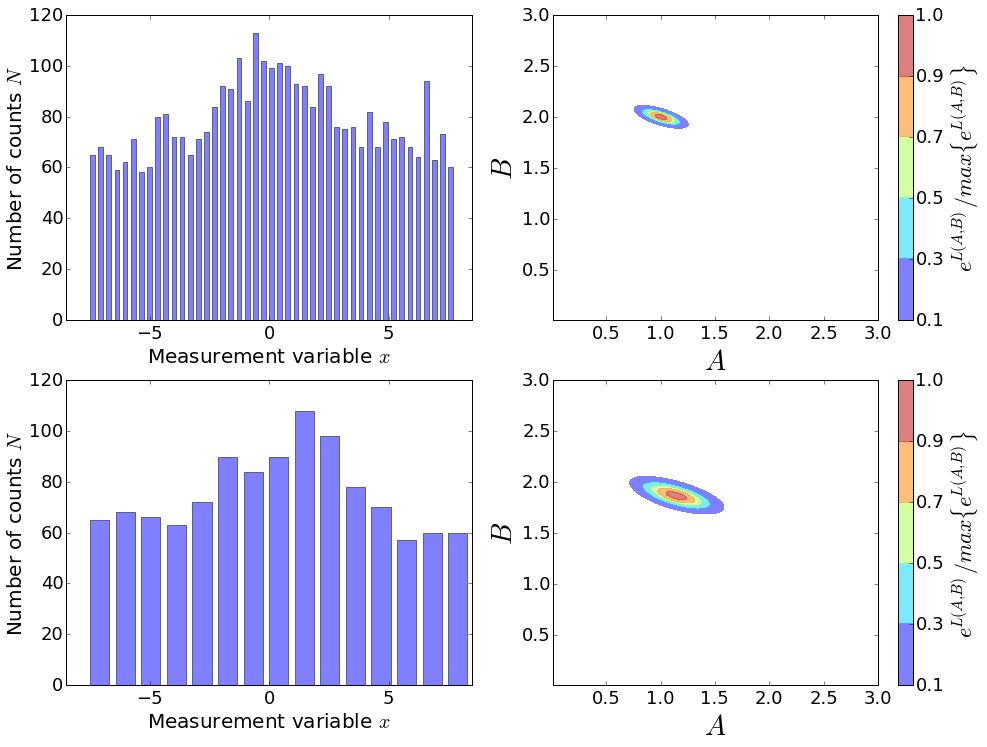

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

plot_post(axes[0,0], axes[0,1], nbins=45, xlim=[-7.5, 7.5], n0=33.5, seed=seed, width=0.2)
plot_post(axes[1,0], axes[1,1], nbins=15, xlim=[-7.5, 7.5], n0=33.5, seed=seed, width=0.8)
plt.show()

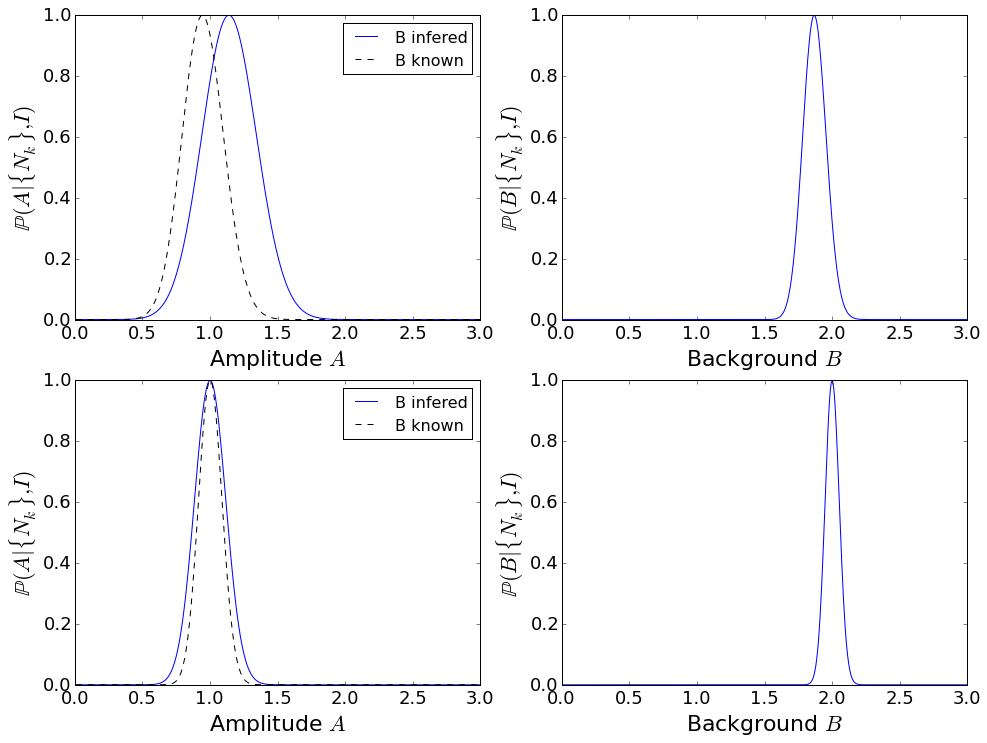

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
plot_marginals(axes[0,0], axes[0,1], nbins=15, xlim=[-7.5, 7.5], n0=33.5, seed=seed)
plot_marginals(axes[1,0], axes[1,1], nbins=45, xlim=[-7.5, 7.5], n0=33.5, seed=seed)
plt.show()

Figure 3.5 shows the data for the same experimental set-up as in the first panel of Fig. 3.3, but where the bins are four times narrower than before; this data-set looks noisier because, on average, each channel has only a quarter of the previous number of counts. Figure 3.5 also shows the resulting posterior pdf for $A$ and $B$, and its marginal distributions, given that $w = 2.12$ and $x_O = 0$. Compared with the corresponding pdfs in Figs 3.3 and 3.4, the reliability of the inferred parameters is virtually identical. This illustrates that the perceived improvement in the data quality afforded by the binning procedure is largely cosmetic. While this visual gain is not without value, and there are computational advantages in dealing with fewer ‘measurements’, we must always be aware that too coarse a binning can destroy useful information in the data. To take an extreme case, if all the counts were added together into a single number, we would completely lose all our ability to distinguish the signal from the background! At a more mundane level, if the data-channels are too wide, we could also get into trouble with the integral approximation of eqn (3.13). Some of the issues related to optimal binning strategies are discussed further in Chapter 7.

## 3.2 Reliabilities: best estimages, correlations and error-bars

We have now seen an example of an estimation problem involving more than one parameter. Although the posterior pdf is of a higher dimensionality, being a function of several variables, it still encodes our inference about the values of the parameters, given the data and the relevant background information. As before, we often wish to summarize it with just a few numbers: the best estimates and a measure of their reliabilities. Since the probability (density) associated with any particular set of values for the parameters is a measure of how much we believe that they (really) lie in the neighbourhood of those values, our optimal estimate is given by the maximum of the posterior pdf. If we denote the quantities of interest by $\{X_j\}$, with a posterior pdf $P = \prob(\{X_j\}|\{\text{data}\}, I)$, then the best estimate of their values, $\{X_{Oj}\}$, is given by the solution to the set of *simultaneous equations*:

\begin{align}
\left.\frac{\partial P}{\partial X_i}\right|_{\{X_{Oj}\}} = 0 \qquad(3.14),
\end{align}

where i = 1, 2, . . . , up to the number of parameters to be inferred. Strictly speaking, we also need a further test, analogous to eqn (2.9), to ensure that we are dealing with a maximum and not a minimum or a saddle-point; we’ll say more about that shortly. In writing the partial derivatives of P with respect to the $X_i$’s we are, of course, assuming that they can all lie in a continuous range. If some could only take discrete values, our best estimate would still correspond to the one with greatest posterior probability but we couldn’t then use the calculus notation of eqn (3.14).

As in Section 2.2, it is more convenient to work with the logarithm of $P$ rather than use the posterior pdf itself:

$$ L = \log_e\left[\prob(\Xjs | \data, I)\right] \qquad(3.15)$$

Since the logarithm is a monotonic function, the maximum of $L$ occurs at the same place as that of $P$; hence, eqn (3.14) can be written with $L$ substituted for $P$. Rather than 
pursuing this analysis in generality, with several parameters, let us first consider the specific case of just two variables; we will denote them by $X$ and $Y$, instead of $X_1$ and $X_2$, to reduce the multiplicity of subscripts. The pair of simultaneous equations which we must now solve, to obtain our best estimates $\Xo$ and $\Yo$, are given by

$$\left.\frac{\partial L}{\partial X}\right|_{\Xo,\Yo} = 0 \qquad \text{and} \qquad \left.\frac{\partial L}{\partial Y}\right|_{\Xo,\Yo} = 0, \qquad(3.16)$$

where $L = \log_e\left[\prob(X,Y | \data, I)\right]$.

To obtain a measure of the reliability of this best estimate, we need to look at the spread of the two-dimensional posterior pdf about the point $(\Xo, \Yo)$. As in Section 2.2, we can analyse the local behaviour of a (potentially) complicated function by using a Taylor series expansion:

\begin{align}
L &= L(\Xo, \Yo) + \half \left[
\left.\frac{\partial^2 L}{\partial X^2}\right|_{\Xo,\Yo} (X - \Xo)^2 + \left.\frac{\partial^2 L}{\partial Y^2}\right|_{\Xo,\Yo} (Y - \Yo)^2 + 
2 \left.\frac{\partial^2 L}{\partial X\partial Y}\right|_{\Xo,\Yo} (X - \Xo)(Y - \Yo) \right] + \dots, \qquad (3.17),
\end{align}
￼￼￼
where $\Xo$ and $\Yo$ are given by the condition of eqn (3.16). Although this expression looks quite horrendous, it is simply the two-dimensional version of eqn (2.11); it’s just that there are now for second (partial) derivatives to deal with, instead of just one! We have, in fact, reduced this tally of terms to three by using the equality of the mixed derivatives:

$$\frac{\partial^2L}{\partial X \partial Y} = \frac{\partial^2L}{\partial Y \partial X}$$. 

The first term in the Taylor series, $L(\Xo,\Yo)$, is a constant and tells us nothing about the shape of the posterior pdf. The two linear terms, which would be proportional to $(X − \Xo)$ and $(Y − \Yo$, are missing because we are expanding about the maximum (as indicated by eqn 3.16). The three quadratic terms are, therefore, the dominant factors determining the width of the posterior pdf, and play a central role in the reliability analysis; let us study them more closely.

To aid the generalization of this discussion to the case of several variables a little later, let us rewrite the quadratic part of eqn (3.17) in matrix notation; calling the quantity in the square brackets $Q$, we have

\begin{align}
Q =
\left(
\begin{array}{cc}
X - \Xo  & Y - \Yo \\
\end{array}
\right)
\left(
\begin{array}{cc}
A & B \\
C & D \\
\end{array}
\right)
\left(
\begin{array}{c}
X - \Xo  \\
Y - \Yo  \\
\end{array}
\right),
\qquad (3.18)
\end{align}

where the components of the $2 \times 2$ symmetric matrix in the middle are given by the second derivatives of $L$, evaluated at the maximum $(\Xo , \Yo)$:

\begin{align}
A = \left.\frac{\partial^2 L}{\partial X^2}\right|_{\Xo,\Yo}, \quad 
B = \left.\frac{\partial^2 L}{\partial Y^2}\right|_{\Xo,\Yo}, \quad 
B = \left.\frac{\partial^2 L}{\partial X \partial Y}\right|_{\Xo,\Yo}. \qquad (3.19)
\end{align}

Figure 3.6 shows a contour of $Q$ in the $X - Y$ plane; within our quadratic approximation, it is also a line along which the posterior pdf is constant. It is an ellipse, centred at $(\Xo , \Yo)$, the orientation and eccentricity of which are determined by the values of $A$, $B$ and $C$; for a given contour-level $(Q = k)$, they also govern its size. The directions of the principal axes formally correspond to the eigenvectors of the second-derivative

<img src="fig3p6.png" width=900/>

matrix of eqns (3.18) and (3.19); that is to say, the $(x, y)$ components of $\bf{e}_1$ and $\bf{e}_2$ in Fig. 3.6 are given by the solutions of the equation

\begin{align}
\left(
\begin{array}{cc}
A & B \\
C & D \\
\end{array}
\right)
\left(
\begin{array}{c}
x \\
y \\
\end{array}
\right) = \lambda
\left(
\begin{array}{c}
x \\
y \\
\end{array}
\right).
\qquad (3.20)
\end{align}

The two eigenvalues $\lambda_1$ and $\lambda_2$ which satisfy eqn (3.20) are, in turn, inversely related to the square of the widths of the ellipse along its principal directions. Furthermore, if the point $(\Xo , \Yo)$ in eqn (3.16) is to be a maximum rather than a minimum or a saddlepoint, both $\lambda_1$ and $\lambda_2$ must be negative; in terms of $A$, $B$ and $C$, this requirement takes the form

$$A < 0 ,\qquad B < 0 , \qquad AB > C^2.$$

Returning to the question of the reliability of our best estimates, this would be easy to define if the ellipse in Fig. 3.6 was aligned with the $X$ and $Y$ coordinate axes; this is so when $C = 0$. In that case, the error-bars for $\Xo$ and $\Yo$ will just be inversely proportional to the square root of (the modulus of) the appropriate eigenvalues (which are then simply $A$ and $B$). What should we do if the ellipse is skewed?

If we were only interested in knowing the value of X, then we would integrate out Y as a nuisance parameter:

$$\prob(X |\data, I ) = \intinf \prob(X, Y |\data, I )\ dY.$$

This integral can be done analytically within the quadratic approximation of eqns (3.17)– (3.19): $\prob(X,Y |\data,I) = \exp(L) \propto \exp(Q/2)$. Assuming that the joint poste- rior pdf is not (significantly) truncated by the bounds of the prior, Appendix A shows the result to be

$$\prob(X|\data,I) \propto \exp\left(\half\left[\frac{AB−C^2}{B}\right](X−\Xo)^2\right),$$

where we have omitted the normalization constant. Comparing this to eqns (2.13) and (2.14), we see that the marginal distribution for $X$ is just a simple one-dimensional Gaussian pdf; our best estimate is still $\Xo$, and it sassociated error-bar $\sigma_X$ is givenby

\begin{align}
\sigma_X = \sqrt{\frac{-B}{AB - C^2}}. \qquad (3.21)
\end{align}

**proof:**

Start with the marginal probability:

\begin{align}
\prob(X |\data, I ) 
    &= \intinf \prob(X, Y |\data, I )\ dY \\
    &= \intinf \exp\left\{{\frac{Q}{2}}\right\}\ dY
\end{align}

Where,

\begin{align}
Q &= A(X - \Xo)^2 + B(Y - \Yo)^2 + 2C(X - \Xo)(Y - \Yo) \\
  &= -\left[a x^2 + b y^2 - 2c xy \right]
\end{align}

so not integral becomes

\begin{align}
\intinf \exp\left\{{\frac{Q}{2}}\right\}\ dY
    &= \intinf dy\ \exp\left\{ -\half\left[a x^2 + b y^2 - 2c xy \right] \right\} \\
    &=  \exp\left\{ -\half a x^2 \right\} \intinf dy\ \exp\left\{ -\half\left[b y^2 - 2c xy \right] \right\} \\
\end{align}

complete the square on the argument of the integrands exponential:

$$by^2 + 2cxy = b\left(y + \frac{cx}{b}\right)^2 - \frac{c^2}{b}x^2$$

plugging this in, we get

\begin{align}
    &=  \exp\left\{ -\half\left(a - \frac{c^2}{b}\right)x^2 \right\} \intinf dy\ \exp\left\{ -\frac{b}{2}\left(y + \frac{cx}{b}\right)^2 \right\}.
\end{align}

let $u = y + \frac{cx}{b}$ and thus $du = dy$.  Consider the interal above:

$$\intinf du\ exp\left\{ -\frac{b u^2}{2} \right\} = \sqrt{\frac{\twopi}{b}}$$

Puttting it all together we get:

\begin{align}
\prob(X |\data, I ) 
    &= \sqrt{\frac{\twopi}{b}}\exp\left\{ -\half\left(a - \frac{c^2}{b}\right)x^2 \right\} \\
    &= \sqrt{\frac{\twopi}{b}}\exp\left\{ -\half\left(\frac{AB - C^2}{-B}\right)x^2 \right\} \\
    &= \sqrt{\frac{\twopi}{b}}\exp\left\{ -\frac{x^2}{2\sigma_X} \right\}
\end{align}

So 

$$\sigma_X = \sqrt{\frac{-B}{AB - C^2}}.$$

We can obtain an analogous result for $Y$, yielding a marginal error-bar $\sigma_Y$ :

\begin{align}
\sigma_Y = \sqrt{\frac{-A}{AB - C^2}}. \qquad (3.22)
\end{align}

While the expressions for $\sigma_X$ and $\sigma_Y$ above provide a useful measure of the reliability of our best estimates, in general, they paint an incomplete picture. To understand this, we must consider the denominator of eqns (3.21) and (3.22) in a bit more detail. The term $AB−C^2$ is, in fact, the determinant of the matrix in eqn (3.20); for such a real symmetric matrix, this is equal to the product of its eigenvalues. Thus if either $\lambda_1$ or $\lambda_2$ becomes very small, so that the ellipse in Fig. 3.6 is extremely elongated in one of its principal directions, then $AB−C^2 \rightarrow 0$; consequently, apart from the special case when $C = 0$, both $\sigma_X$ and $\sigma_Y$ will be huge. Although this correctly warns us that neither $X$ nor $Y$ can be inferred reliably on the basis of the current data, it fails to tell us that there could still be some joint aspect of the two which can be determined well, because the posterior pdf might be very sharp in one direction while being extremely broad in the other. To see how this information can be conveyed, let us first look at the concept of error-bars again in a slightly different way.

So far, from eqn (2.14), we have thought of the error-bar as representing the width of a Gaussian pdf: $\text{FWHM} \approx 2.35\sigma$. Another way to think about it is in terms of the variance of the posterior, which also gives a measure of its spread. It is formally defined to be the expectation value of the square of the deviations from the mean; assuming a normalized pdf, this is given by

$$\operatorname{Var}(X) = \left< (X−\mu)^2 \right> = \int dX\ (X−\mu)^2 \prob(X|\data,I), \qquad (3.23)$$ 

where $\mu$ is the average value $\left<X\right>$, as in eqn (2.22). For the one-dimensional normal distribution of eqn (2.14), this integral yields the result

$$\left< (X−\mu)^2 \right> = \sigma^2. \qquad (3.24)$$

The square root of the variance is called the standard deviation, or the root-mean-square (r.m.s.) error, of X . This definition of the error-bar can be extended to pdfs of more than one variable. Explicitly, for the two-dimensional case we have been considering,

$$\sigma_X^2 = \left< (X−\Xo)^2\right> = \iint dX dY\ (X−\Xo)^2 \prob(X,Y |\data,I), \qquad (3.25)$$

where $\sigma_X$ is the same as in eqn(3.21) when the double integral is evaluated within the quadratic approximation of eqns (3.17)–(3.19). The corresponding expression for $\sigma_Y$ is similar, with the $X$’s and $Y$’s swapped around.

The idea of variance can be broadened to consider the simultaneous deviations of both $X$ and $Y$; this covariance, which we will denote as $\sigma_{XY}^2$, is given by

$$\sigma_{XY}^2 = \left< (X−\Xo)(Y-\Yo)\right> = \iint dX dY\ (X−\Xo)(Y-\Yo) \prob(X,Y |\data,I), \qquad (3.26)$$

and is a measure of the correlation between the inferred parameters. If an over-estimate of one usually leads to a larger than average value for the other, then the difference $Y − \Yo$ will tend to be positive when $X − \Xo$ is positive; if the same is true for under-estimates, so that $Y−\Yo$ is usually negative when $X−\Xo$ is as well, the expectation value of the product of the deviations will be positive: the covariance will then be greater than zero. If there is an anti-correlation, so that an over-estimate of one is accompanied by an under-estimation of the other, then the covariance will be negative. When our estimate of one parameter has little, or no, influence on the inferred value of the other, then the magnitude of the covariance will be negligible in comparison to the variance terms; in other words, $|\sigma_{XY}^2| \ll \sqrt{\sigma_X^2 \sigma_Y^2}$.

When the double integral of eqn (3.26) is evaluated within the quadratic approximation of eqns (3.17)–(3.19), it yields the result

$$\sigma_{XY}^2 = \frac{C}{AB - C^2}. \qquad (3.27)$$

In conjunction with eqns (3.21) and (3.22), therefore, we see that both the variance and covariance terms are given by (minus) the elements of the inverse of the second-derivative matrix of eqn (3.20):


\begin{align}
\left(
\begin{array}{cc}
\sigma_X^2    & \sigma_{XY}^2 \\
\sigma_{XY}^2 & \sigma_Y^2    \\
\end{array}
\right) =
\frac{1}{AB - C^2}
\left(
\begin{array}{cc}
- B & C \\
 C & -A 
\end{array}
\right) = 
- 
\left(
\begin{array}{cc}
A & C \\
C & B 
\end{array}
\right)^{-1}.
\qquad (3.28)
\end{align}


This table of ‘error-bar products’ is called the covariance matrix. When $C = 0$, $\sigma_{XY}^2$ also equals zero and means that the inferred values of the parameters are uncorrelated. In that case, the principal directions of the corresponding posterior pdf will be parallel to the coordinates axes; this situation is illustrated in Fig. 3.7(a). As the magnitude of C increases, relative to A and B, the posterior pdf becomes more and more skew and elongated; this reflects the growing strength of the correlation between our estimates

<img src="fig3p7.png" width=900/>

of $X$ and $Y$, and is shown schematically in Figs 3.7(b) and (c). In the extreme case, when $C = \pm\sqrt{AB}$, the elliptical contours will be infinitely wide in one direction (with ￼only the information in the prior preventing this catastrophe!) and oriented at an angle $\pm \tan^{−1}\sqrt{A/B}$ with respect to the $X$-axis. Although the error-bars $\sigma_X$ and $\sigma_Y$ will be ￼huge, saying that our individual estimates of $X$ and $Y$ are completely unreliable, the large off-diagonal elements of the covariance matrix tells us that we can still infer a linear combination of these parameters quite well. If the covariance is negative, then the posterior pdf will be very broad in the direction $Y = − mX$, where $m = \sqrt{A/B}$, but fairly narrow perpendicular to it; this bunching of the probability contours along the lines of ‘$Y + mX = \text{a constant}$’ indicates that the data contain a lot of information about the sum $Y + mX$, but little about the difference $Y − X/m$. Similarly, when the covariance is positive, we can infer the difference $Y − mX$ but not the sum $Y + X/m$.

### 3.2.1 Generalization of the quadratic approximation